In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import cv2

In [1]:
import cv2
import numpy as np

# Function to detect hexagon shapes
def detect_hexagons(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise and help contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Use Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    hexagons = []
    
    # Loop through the contours
    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        # If the polygon has 6 vertices, consider it a hexagon
        if len(approx) == 6:
            hexagons.append(approx)
    
    return hexagons

# Open the camera
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Detect hexagons
    hexagons = detect_hexagons(frame)

    # Draw contours on the frame
    cv2.drawContours(frame, hexagons, -1, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Hexagon Detection', frame)

    # Capture an image on key press (change the key if needed)
    if cv2.waitKey(1) & 0xFF == ord('c'):
        cv2.imwrite('captured_image.jpg', frame)
        print('Image captured!')

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()


In [1]:
pip install --user roboflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
from roboflow import Roboflow

# Initialize Roboflow
rf = Roboflow(api_key="dhOw3ym7s1Kivzengl6a")
project = rf.workspace().project("bolt-sgg5o")
model = project.version(4).model

# infer on a local image
print(model.predict("myimg.jpg", confidence=40, overlap=30).json())

# visualize your prediction

model.predict("myimg.jpg", confidence=40, overlap=30).save("c_pred.jpg")




loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 320.0, 'y': 320.5, 'width': 502.0, 'height': 273.0, 'confidence': 0.9469457864761353, 'class': 'bolt', 'class_id': 0, 'image_path': 'myimg.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '640', 'height': '640'}}


In [2]:
output  = model.predict("myimg.jpg", confidence=40, overlap=30).json()

HTTPError: 403 Client Error: Forbidden for url: https://detect.roboflow.com/bolt-sgg5o/3?api_key=ZEsjQSUZgajPJ4DtvNLQ&name=YOUR_IMAGE.jpg&overlap=30&confidence=40&stroke=1&labels=false&format=json

In [7]:
# Assuming you have the output stored in the variable 'output'
predictions = output['predictions']

# Extract values for xmin, ymin, xmax, and ymax from the first prediction (assuming there is only one prediction)
xmin = int(predictions[0]['x'])
ymin = int(predictions[0]['y'])
xmax = int(predictions[0]['x'] + predictions[0]['width'])
ymax = int(predictions[0]['y'] + predictions[0]['height'])

# Print the values
print("xmin:", xmin)
print("ymin:", ymin)
print("xmax:", xmax)
print("ymax:", ymax)


xmin: 320
ymin: 320
xmax: 822
ymax: 593


In [2]:
import os
import pandas as pd

In [3]:
image_folder = "mergeddataset"

In [4]:
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
print(len(image_files))

320


In [6]:
conf_array = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    # Make prediction
#     print("hey")
    output = model.predict(image_path, confidence=40, overlap=30).json()
    predictions = output['predictions']
    if predictions:
        confid = predictions[0]['confidence']
        conf_array.append(int(confid*100))
print(len(conf_array))

311


In [7]:
count = 0;
for x in conf_array :
    if x < 80 :
        count =  count + 1
print(count)

33


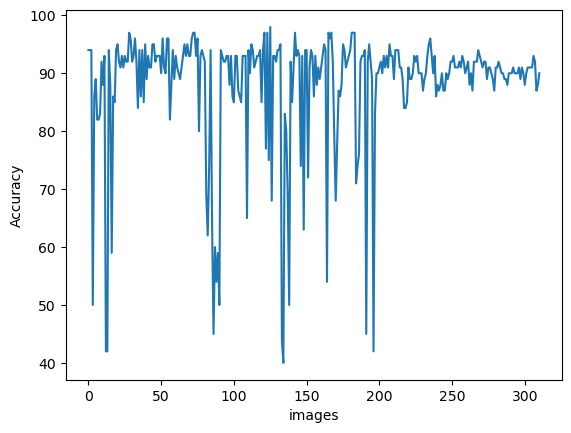

In [49]:
import matplotlib.pyplot as plt

# Your array of values

# Create a line graph
plt.plot(conf_array)

# Add labels and title
plt.xlabel('images')
plt.ylabel('Accuracy')
# plt.title('Accuracy graph')

# Display the graph
plt.show()


In [33]:
print(conf_array[0:5])

[92, 93, 94, 97, 54]


In [10]:
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    
    # Make prediction
    output = model.predict(image_path, confidence=40, overlap=30).json()
    predictions = output['predictions']
    #print(predictions)
    if predictions:
    # Extract values for xmin, ymin, xmax, and ymax from the first prediction (assuming there is only one prediction)
        xmin = int(predictions[0]['x'])
        ymin = int(predictions[0]['y'])
        xmax = int(predictions[0]['x'] + predictions[0]['width'])
        ymax = int(predictions[0]['y'] + predictions[0]['height'])
        cls = predictions[0]['class']
        results.append({
            "filename": image_file,
            "width" : predictions[0]['width'],
            "height" : predictions[0]['height'],
            "classy" : cls,
            "p_xmin": xmin,
            "p_ymin": ymin,
            "p_xmax": xmax,
            "p_ymax": ymax,
        })

In [11]:
df_results = pd.DataFrame(results)

# Save DataFrame to a CSV file
df_results.to_csv("predicted_annotations.csv", index=False)

In [14]:
print(df_results.columns)
print(df_results.head(10))

Index(['filename', 'width', 'height', 'classy', 'p_xmin', 'p_ymin', 'p_xmax',
       'p_ymax'],
      dtype='object')
                                            filename  width  height classy  \
0  image_24_jpg.rf.52b1cb8bdc49d79f9f30e69d22f4f1...  433.0   354.0   bolt   
1  image_28_jpg.rf.ab946b6c22453a263ea90377c47035...  443.0   354.0   bolt   
2  image_33_jpg.rf.bf377898fd9dfba7d0e05fa34e6861...  200.0   257.0    nat   
3  image_49_jpg.rf.f19ae7991b555f96a1e211bd378b90...  579.0   546.0    nat   
4  image_55_jpg.rf.de44ee6e7da868a7fa613b58e77eb5...  587.0   622.0   bolt   
5  image_57_jpg.rf.caee4215899d5c580b1be1ce35f2c8...  158.0   192.0    nat   
6  image_65_jpg.rf.b5971af29c3177b124a43852a1b696...  180.0   159.0    nat   
7  image_67_jpg.rf.2b92dd378f679a6f7f70f682217656...  640.0   585.0   bolt   
8  image_73_jpg.rf.42b199b9564243502b90eb81b76d26...  309.0   532.0   bolt   
9  IMG_0433_jpg.rf.ace1b07ce0155b97d5aff832742d47...   79.0    86.0   bolt   

   p_xmin  p_ymin  p_xm

In [15]:
print(merged_df.columns)


Index(['filename', 'width_x', 'height_x', 'class', 'xmin', 'ymin', 'xmax',
       'ymax', 'width_y', 'height_y', 'classy', 'p_xmin', 'p_ymin', 'p_xmax',
       'p_ymax', 'iou'],
      dtype='object')


In [16]:
merged_df.to_csv("newmerge.csv", index=False)

Index(['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'], dtype='object')
Index(['filename', 'width', 'height', 'classy', 'p_xmin', 'p_ymin', 'p_xmax',
       'p_ymax'],
      dtype='object')
Precision: 0.92
Recall: 1.00


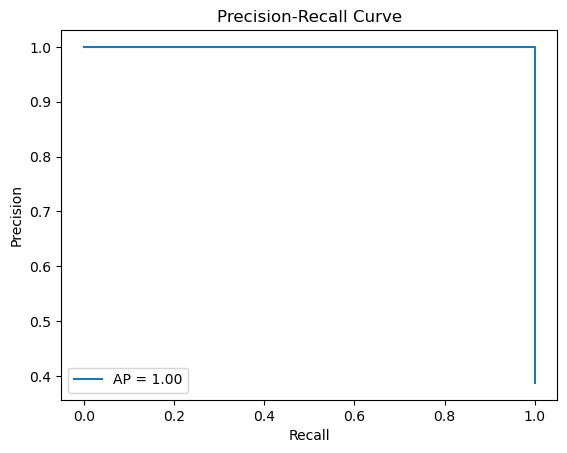

Average Precision (AP): 1.00


In [21]:
import pandas as pd
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load actual results and predicted values CSV files
actual_df = pd.read_csv("actual.csv")  # Replace with the actual path
predicted_df = pd.read_csv("predicted_annotations.csv")  # Replace with the actual path
print(actual_df.columns)
print(predicted_df.columns)

# Merge DataFrames based on the 'filename' column
merged_df = pd.merge(actual_df, predicted_df, on='filename', how='inner')

# Function to calculate Intersection over Union (IoU)
def calculate_iou(row):
    actual_box = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
    predicted_box = [row['p_xmin'], row['p_ymin'], row['p_xmax'], row['p_ymax']]

    # Calculate intersection and union
    x_min = max(actual_box[0], predicted_box[0])
    y_min = max(actual_box[1], predicted_box[1])
    x_max = min(actual_box[2], predicted_box[2])
    y_max = min(actual_box[3], predicted_box[3])

    intersection_area = max(0, x_max - x_min + 1) * max(0, y_max - y_min + 1)
    actual_area = (actual_box[2] - actual_box[0] + 1) * (actual_box[3] - actual_box[1] + 1)
    predicted_area = (predicted_box[2] - predicted_box[0] + 1) * (predicted_box[3] - predicted_box[1] + 1)

    union_area = actual_area + predicted_area - intersection_area

    # Avoid division by zero
    if union_area == 0:
        return 0.0

    # Calculate IoU
    iou = intersection_area / union_area
    return iou

# Apply the IoU calculation function to each row
merged_df['iou'] = merged_df.apply(calculate_iou, axis=1)

# Drop rows with NaN values in the 'iou' column
merged_df = merged_df.dropna(subset=['iou'])

# Evaluate precision and recall using IoU threshold
iou_threshold = 0.1
positive_samples = len(merged_df) > 0
true_positives = merged_df['iou'] > iou_threshold
false_positives = ~true_positives

# Calculate precision and recall only if there are positive samples
if positive_samples:
    precision, recall, thresholds = precision_recall_curve(true_positives, merged_df['iou'], pos_label=1)
    average_precision = average_precision_score(true_positives, merged_df['iou'])
    print(f"Precision: {precision[1]:.2f}")
    print(f"Recall: {recall[1]:.2f}")
    # Precision-Recall curve
    plt.plot(recall, precision, label=f'AP = {average_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()
# Print average precision
    print(f"Average Precision (AP): {average_precision:.2f}")
else:
    print("No positive samples found.")




In [57]:
merged_df.to_csv("newmerge3.csv", index=False)